# Flight Price Prediction

Problem Statement: Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv(r"C:\\Users\\nams\\Data_Train.csv")
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


About the Dataset: 


This train dataset contains the data about the price of flights of different airlines. For predicting the price based on the actual data we will take help of the other features provided in the dataset.

The features present are information on:
Airline

Date of Journey

Source

Destination

Route

Dep_Time

Arrival Time

Duration

Total_Stops

Additional-Info

The target variable here is the price/fare which is a continuous data. Based on this we will build a predicting model for continuous data that is a regression model.

# Exploratory Data Analysis(EDA)

In [3]:
#Checking the size of the dataset
df_train.shape

(10683, 11)

We can see that we have 10683 rows and 11 columns out of which 10 are features and 1 is the target column

In [4]:
#Checking and overall overview of the datset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


From this we can see that the dataset here shows apart from price all the columns have object type data with no null values, however we will check seperately and use the encoding and imputation techniques to make the date ready for modelling.

In [5]:
#checking the uniqueness of the dataset
df_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [6]:
#checking the null values
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We can here see that the feature Route and Total_stops has 1 null values each.

In [7]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We can see here that python is showing Date of journey, departure time and arrival time as object, hence we will have to convert it to timestamp for modelling

In [8]:
# Checking the value counts of each columns
for i in df_train.columns:
    print(df_train[i].value_counts())
    print('_____________________________________')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
_____________________________________
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     20

From the above value counts we can observe some repeated categories in some columns.

# Feature Engineering and Data Cleaning

Based on the analysis done above we will do the feature engineering and data cleaning

(1)
The columns Date_of_Journey, Dept_Time and Arrival_Time showing object data type which means python is not able to understand the type of data in this column.Therefore, we have to convert this datatype into timestamp to use them properly for prediction.

In [9]:
# Converting Date and Time columns from object type to Datetime Type
df_train['Date_of_Journey']=pd.to_datetime(df_train['Date_of_Journey'])
df_train['Dep_Time']=pd.to_datetime(df_train['Dep_Time'])
df_train['Arrival_Time']=pd.to_datetime(df_train['Arrival_Time'])

In [10]:
#checking dtypes after making the changes
df_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

We have data from only 2019, hence we will extract the dates from it

In [11]:
# Extracting Day from Date_of_Journey column
df_train["Journey_Day"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_Journey column
df_train["Journey_Month"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.month

Now we have converted Date_of_Journey column into integers data type, we can drop this column as it is of no use.

In [12]:
# Dropping Date_of_Journey column
df_train.drop("Date_of_Journey",axis=1,inplace=True)

Now the column Duration has values in terms of minutes and hours.

In [13]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [14]:
# Adding duration hours and duration mins to the data set
df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

# Dropping Duration column
df_train.drop("Duration",axis=1,inplace=True)

Let's extract values from Dep_Time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Dep_Time.

In [15]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Dep_Time column
df_train["Dep_Hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time column
df_train["Dep_Min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

In [16]:
# Dropping Dep_Time column
df_train.drop("Dep_Time",axis=1,inplace=True)

Similarly we can extract hours and minutes from Arrival_Time column and accordingly dropping Arrival_time column.

In [17]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Arrival_Time
df_train["Arrival_Hour"] = pd.to_datetime(df_train["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
df_train["Arrival_Min"] = pd.to_datetime(df_train["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
df_train.drop("Arrival_Time",axis=1,inplace=True)

Now we have extracted values from the respective columns, let's check the data frame after feature engineering.

In [18]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,4,45,16,50,21,35


In [19]:
df_train.shape

(10683, 15)

(2)
From the analysis done on EDA part for value counts we have observed that some repeated categories in some columns. Will replace it now

In [20]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
df_train["Airline"] = df_train["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
df_train["Airline"] = df_train["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
df_train["Airline"] = df_train["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
df_train["Destination"] = df_train["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
df_train["Additional_Info"] = df_train["Additional_Info"].replace("No info","No Info")

# Replacing "1 Long layover" and "2 Long layover" as "Long layover" in the column Additional Info
df_train["Additional_Info"] = df_train["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

In [21]:
#Checking the value counts again now
val_count=['Airline','Destination','Additional_Info']

for i in val_count:
    print(df_train[i].value_counts())
    print('_____________________________________')

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64
_____________________________________
Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
_____________________________________
No Info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Long layover                      20
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64
_____________________________________


In [22]:
df_train.nunique()

Airline               9
Source                5
Destination           5
Route               128
Total_Stops           5
Additional_Info       8
Price              1870
Journey_Day           9
Journey_Month         7
Duration_hours       44
Duration_mins        12
Dep_Hour             24
Dep_Min              12
Arrival_Hour         24
Arrival_Min          12
dtype: int64

Now we have the unique numbers in each feature after cleaning the data.

# (3)Treating the Null Values by imputatation

In [23]:
# let's check the mode of the categorical columns to fill the null values 
print("The mode of Route is:",df_train["Route"].mode())  # we will fill the null values using its mode
print("The mode of Total_Stops is:",df_train["Total_Stops"].mode())

The mode of Route is: 0    DEL → BOM → COK
dtype: object
The mode of Total_Stops is: 0    1 stop
dtype: object


In [24]:
# Filling missing values in Route by its mode DEL → BOM → COK
df_train["Route"] = df_train["Route"].fillna(df_train["Route"].mode()[0])

# Filling missing values in Total_Stops by its mode 1 stop
df_train["Total_Stops"] = df_train["Total_Stops"].fillna(df_train["Total_Stops"].mode()[0])

In [25]:
df_train.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Duration_hours     0
Duration_mins      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

<AxesSubplot:>

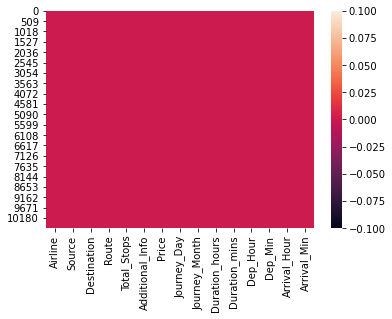

In [26]:
sns.heatmap(df_train.isnull())

We can clearly see that we have successfully imputed the null values now

In [27]:
#checking all the columns in the dataset
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Duration_hours', 'Duration_mins', 'Dep_Hour', 'Dep_Min',
       'Arrival_Hour', 'Arrival_Min'],
      dtype='object')

In [28]:
#checking the uniqueness of the target
df_train['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

This is a continuous data

In [29]:
# Checking the list of counts in target columns
df_train['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
16946      1
10783      1
14861      1
10759      1
4098       1
Name: Price, Length: 1870, dtype: int64

# Statistical Overview of the Train DataSet

In [30]:
df_train.describe()

,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,12.682205,5.534775,10.246092,28.327717,12.490686,24.411214,13.348778,24.690630
std,4611.359167,8.803701,2.987489,8.495414,16.945400,5.748650,18.767980,6.859125,16.506036
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,2.000000,15.000000,8.000000,5.000000,8.000000,10.000000
50%,8372.000000,6.000000,5.000000,8.000000,30.000000,11.000000,25.000000,14.000000,25.000000
75%,12373.000000,21.000000,6.000000,15.000000,45.000000,18.000000,40.000000,19.000000,35.000000
max,79512.000000,27.000000,12.000000,47.000000,55.000000,23.000000,55.000000,23.000000,55.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things

The counts of every column is same which means there are no missing values preent in the dataset. The mean value is greater than the median(50%) in the columns Price, Journey_Day, Duration_hours and Dep_Hour so we can say they are skewed to right. The median(50%) is bit greater than mean in Duration_mins, Dep_Min, Arrival_Hour and Arrival_Min which means they are skewed to left. From the description we can say the minimum price of the flight ticket is Rs.1759 and maximum price is Rs.79512 also the mean is 9087. In summarizing the data we can observe that there is huge difference in maximum and 75% percentile in the columns Price, Arrival_Min, that means huge outliers present in those columns. These differences can also be seen in many other columns. Before going to visualize the data, we will separate numerical and categorical column for better understanding.

In [31]:
# checking for categorical columns
cat_col=[]
for i in df_train.dtypes.index:
    if df_train.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [32]:
# checking for numerical columns
num_col=[]
for i in df_train.dtypes.index:
    if df_train.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['Price', 'Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


# Data Visualization

# Univariate Analysis of the categorical columns

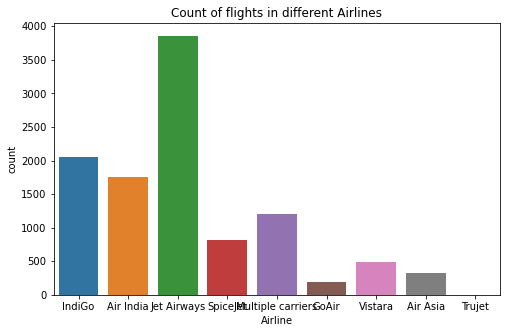

In [33]:
# Visualizing the various Airlines present in the dataset
plt.figure(figsize=(8,5))
sns.countplot(df_train["Airline"])
plt.title("Count of flights in different Airlines")
plt.show()

We can see from the graph that jet airways has the highest counts.

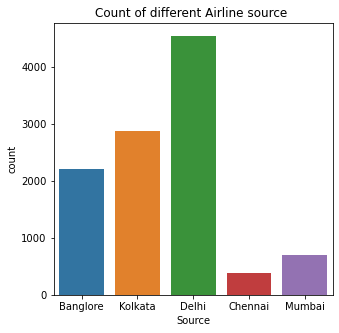

In [34]:
# Visualizing the source from which place the service begins 
plt.figure(figsize=(5,5))
sns.countplot(df_train["Source"])
plt.title("Count of different Airline source ")
plt.show()

We can here see that max flights are from Delhi source

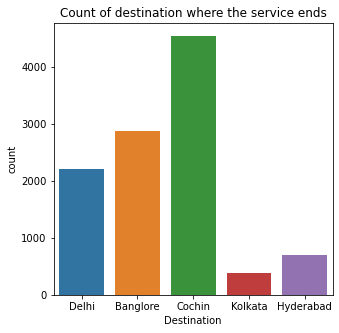

In [35]:
# Visualizing the destination where the service ends 
plt.figure(figsize=(5,5))
sns.countplot(df_train["Destination"])
plt.title("Count of destination where the service ends")
plt.show()

We can see from the above graph that the max flights are to the destination Cochin

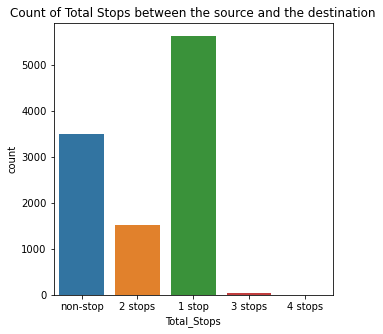

In [36]:
# Visualizing the Total Stops between the source and the destination
plt.figure(figsize=(5,5))
sns.countplot(df_train["Total_Stops"])
plt.title("Count of Total Stops between the source and the destination")
plt.show()

The graph represents that the majority of the flights are with one stop, followed by non-stop flights.

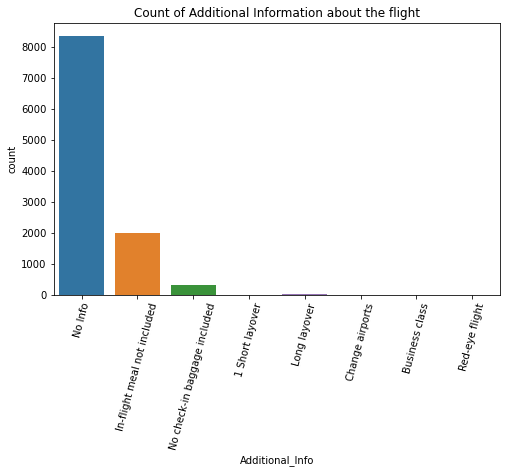

In [37]:
# Visualizing the Additional Information about the flight
plt.figure(figsize=(8,5))
sns.countplot(df_train["Additional_Info"])
plt.title("Count of Additional Information about the flight")
plt.xticks(rotation=75)
plt.show()

The graph clearly represents that we have multiple classes in the additional_info feature, with no_info with major counts followed by in flight meal and then in flight meal not included.

# Univariate Analysis of the numerical columns

Visualizing the disribution of the numerical columns

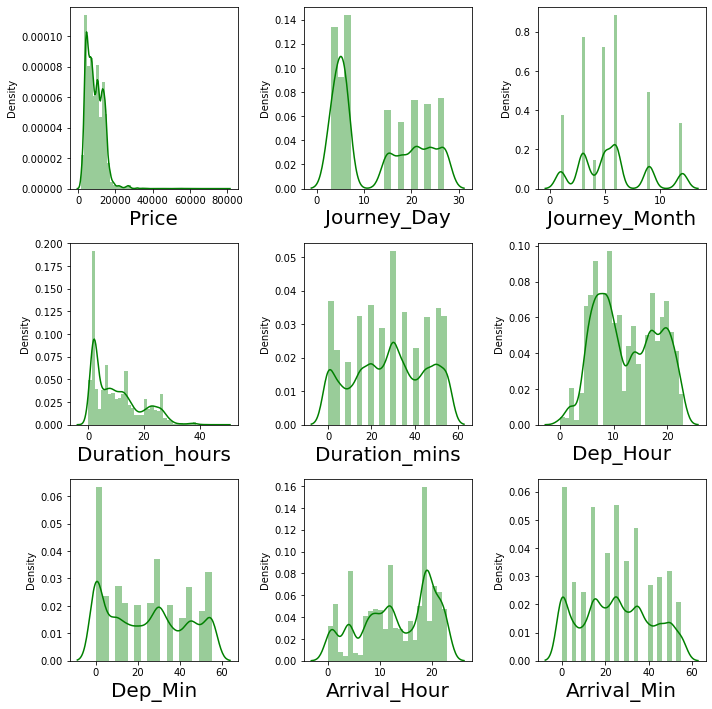

In [38]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_train[column],color="green")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the plotted graph we can see that the data is not normally distributed and some of the columns has skewness.

The target variable 'Price' is skewed right, Duration_hours is skewed right, Dep_hour is slightly skewed left.

Rest of the columns do now show skewness however the data is not normally distributed.

# Bivariate Analysis

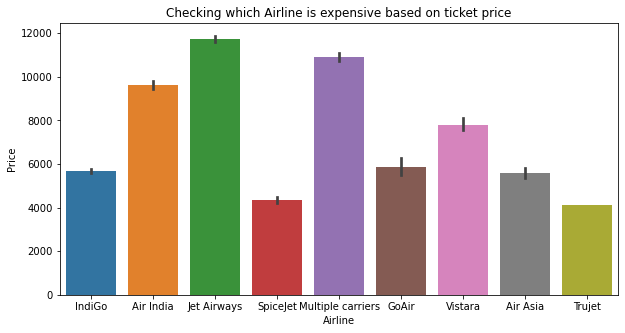

In [39]:
# Let's check which Airline is expensive based on Price of tickets

plt.figure(figsize=(10,5))
sns.barplot(df_train["Airline"],df_train["Price"],data=df_train)
plt.title("Checking which Airline is expensive based on ticket price")
plt.show()

From the plot we can visualize that Jet Airways is the most expensive and SpiceJet and Trujet are the cheapest

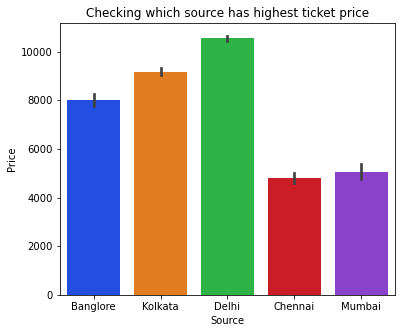

In [40]:
# Let's check the ticket prices in different sources

plt.figure(figsize=(6,5))
sns.barplot(df_train["Source"],df_train["Price"],data=df_train,palette="bright")
plt.title("Checking which source has highest ticket price")
plt.show()

The tickes prices are expensive in Delhi region compared to others and price is cheaper in Chennai and Mumbai sources.

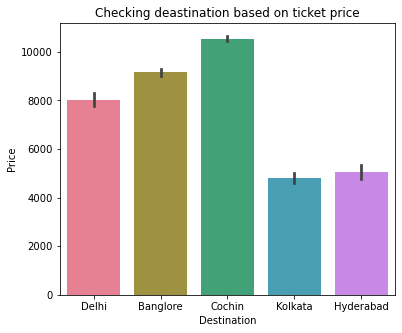

In [41]:
# Let's check how prices changes in each destination 

plt.figure(figsize=(6,5))
sns.barplot(df_train["Destination"],df_train["Price"],data=df_train,palette="husl" )
plt.title("Checking deastination based on ticket price")
plt.show()

The ticket price is high in Cochin destination followed by Bangalore which means they have long distance from the source.

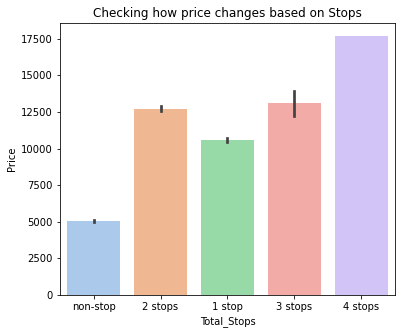

In [42]:

# Let's check the price vs total stops
plt.figure(figsize=(6,5))
sns.barplot(df_train["Total_Stops"],df_train["Price"],data=df_train,palette="pastel")
plt.title("Checking how price changes based on Stops")
plt.show()

From the plot we can vislualize that the flights with 4 stops have highest price followed by flights having 3 stops and the flights which have no stops is having very less ticket price compared to others.

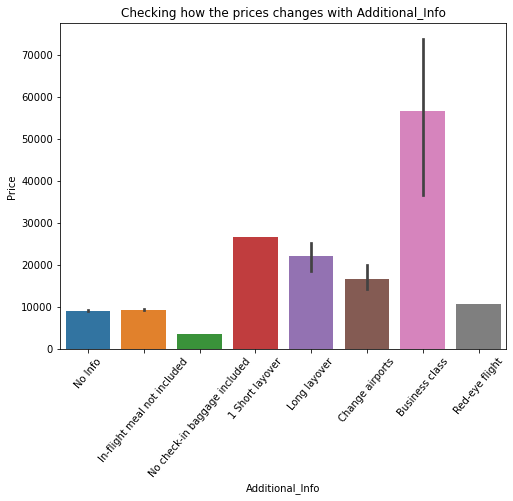

In [43]:
# Let's compare Additional_Info and Price of the flights
plt.figure(figsize=(8,6))
sns.barplot(df_train["Additional_Info"],df_train["Price"],data=df_train)
plt.title("Checking how the prices changes with Additional_Info")
plt.xticks(rotation=50)
plt.show()

The plot shows that the Business class flights are more expensive compared to others and the flights having the class No check-in baggage included has very least ticket price.

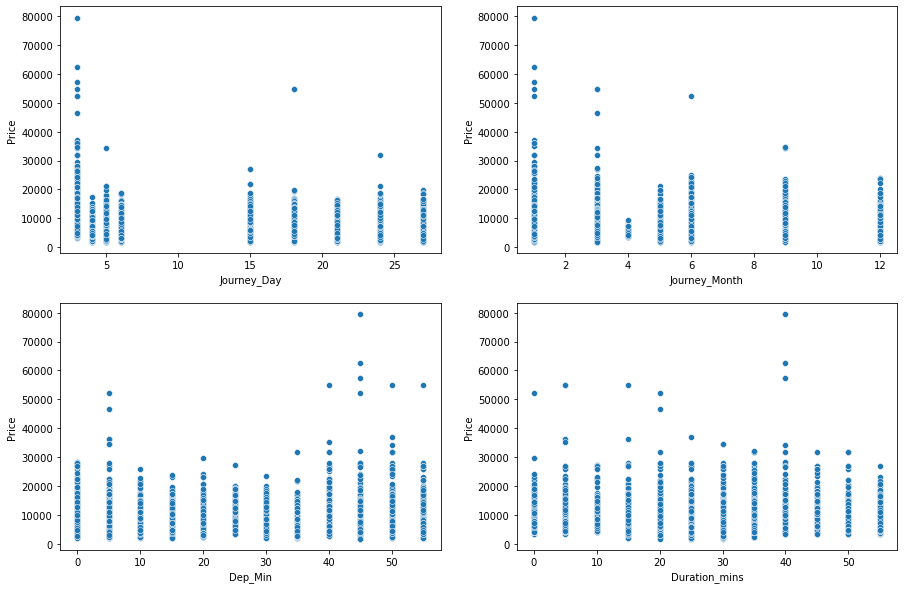

In [44]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

# Checking relation between Journey_Day and Price
sns.scatterplot(x='Journey_Day',y='Price',ax=axes[0,0],data=df_train)

# Checking relation between Journey_Month and Price
sns.scatterplot(x='Journey_Month',y='Price',ax=axes[0,1],data=df_train)

# Checking relation between Dep_Min and Price
sns.scatterplot(x='Dep_Min',y='Price',ax=axes[1,0],data=df_train)

# Checking relation between Duration_mins and Price
sns.scatterplot(x='Duration_mins',y='Price',ax=axes[1,1],data=df_train)
plt.show()

From the above plots we can observe the following

While comparing Journey_Day and Price we can see the price of ticket is high in day 3 apart from this there is no much impact of day on ticket price.

While comparing Journey_Month and Price it can be inferred that the flights travelling in the January month are more expensive than others and the flights travelling in April month have very cheap ticket prices.

There in no significance relation between Dep_MIn and Price of the tickets.

In the fourth graph also we can say there is no much impact of Duration_mins on Price. But we can say duration minutes 10 and 5 have bit high prices compared to others.

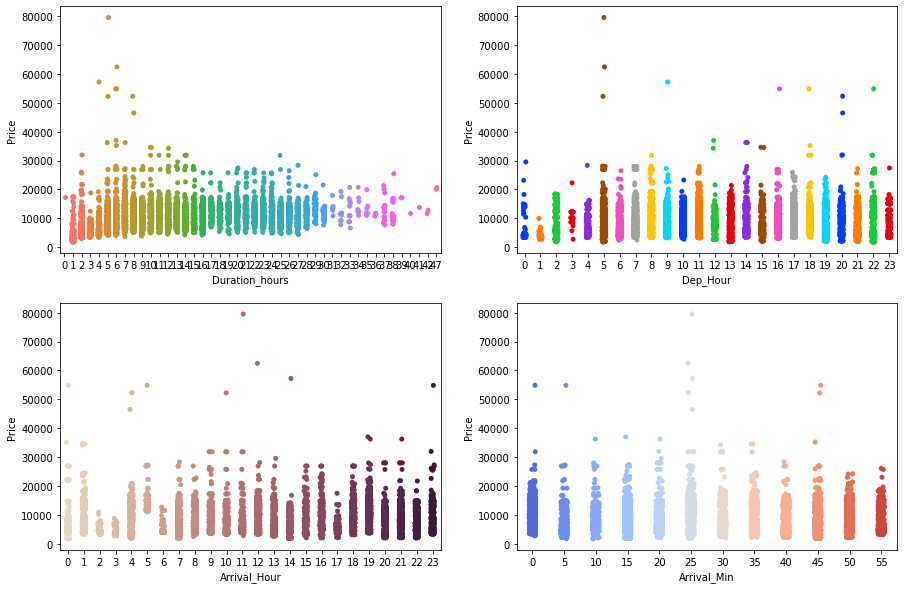

In [45]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

# Checking relation between Duration_hours and Price
sns.stripplot(x='Duration_hours',y='Price',ax=axes[0,0],data=df_train,palette="husl")

# Checking relation between Dep_Hour and Price
sns.stripplot(x='Dep_Hour',y='Price',ax=axes[0,1],data=df_train,palette="bright")

# Checking relation between Arrival_Hour and Price
sns.stripplot(x='Arrival_Hour',y='Price',ax=axes[1,0],data=df_train, palette="ch:.28")

# Checking relation between Arriva_Mins and Price
sns.stripplot(x='Arrival_Min',y='Price',ax=axes[1,1],data=df_train,palette="coolwarm")
plt.show()

From the above plots we can observe there is no much significance differences in any of the classes with the Price.

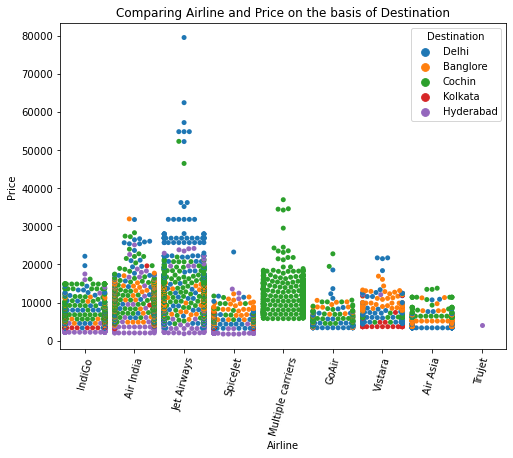

In [46]:
# Checking how the price pays role in Airline on the basis of destination
plt.figure(figsize=(8,6))
sns.swarmplot(x=df_train['Airline'],y=df_train['Price'],hue=df_train["Destination"])
plt.title("Comparing Airline and Price on the basis of Destination")
plt.xticks(rotation=75)
plt.show()

Here we can conclude that the Jet Airways flights that are destined to Delhi are have more expensive ticket prices compared to others.

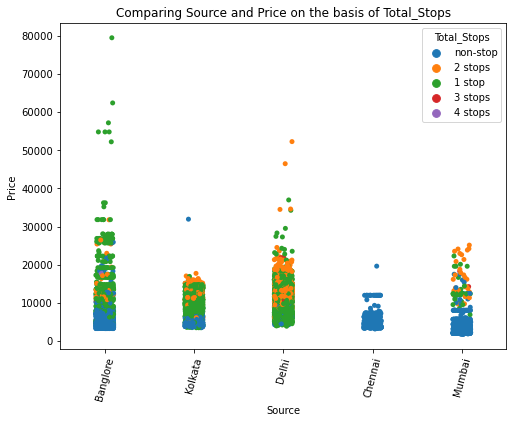

In [47]:
# Checking how the price pays role in Source on the basis of Total_Stops
plt.figure(figsize=(8,6))
sns.stripplot(x=df_train['Source'],y=df_train['Price'],hue=df_train["Total_Stops"])
plt.title("Comparing Source and Price on the basis of Total_Stops")
plt.xticks(rotation=75)
plt.show()

As we can notice that the flights in the Bangalore source which have only one stop between source and destination have bery expensive ticket price and the flights in Chennai with no stops have very cheap prices compared to other source flights..

# Multivariate Analysis

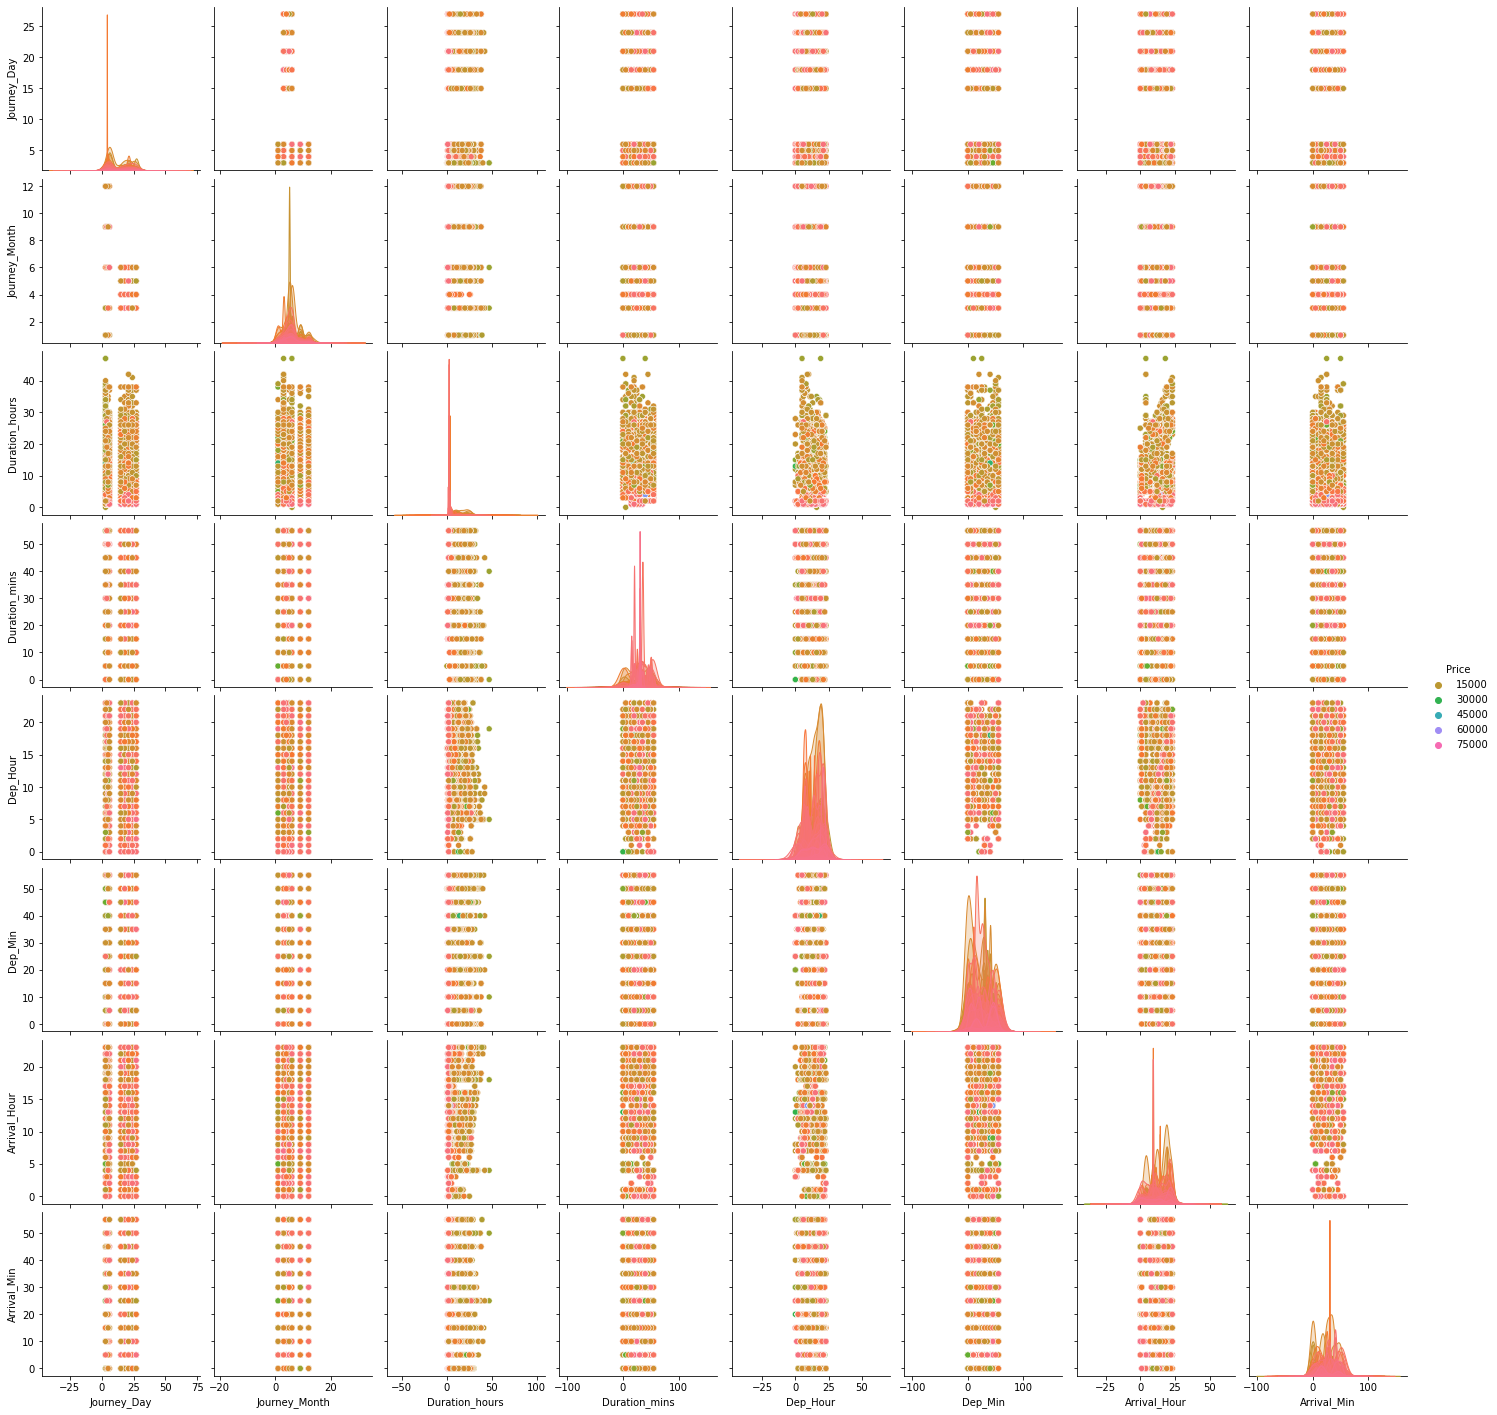

In [48]:
sns.pairplot(df_train,hue="Price",palette="husl")
plt.show()

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Price". Here we can observe the relation between the features and label.

# Identifying the outliers

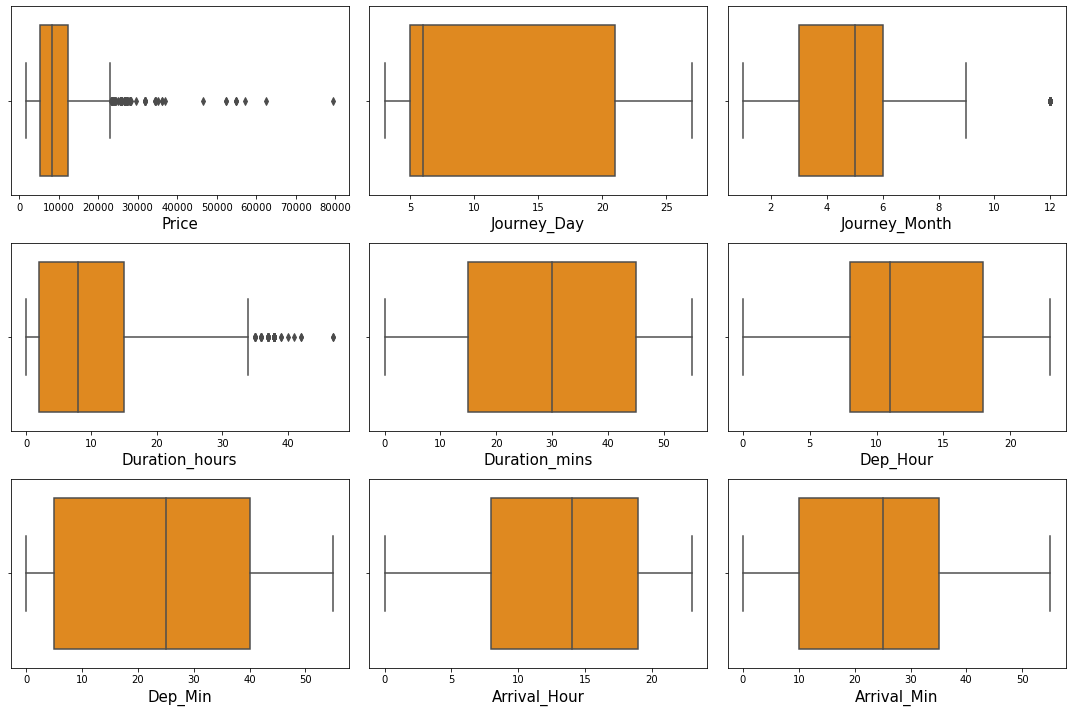

In [49]:
# Identifying the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df_train[column],color="darkorange")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

The outliers present in Price, Journey_Month and Duration_hours.Since Price is our target column so no need to remove outliers in this two columns.

In [50]:
# Feature containing outliers
feature = df_train[['Duration_hours','Journey_Month']]
z=np.abs(zscore(feature))

z

array([[0.97069753, 0.84850298],
       [0.38211718, 1.5179928 ],
       [1.03047566, 1.15996647],
       ...,
       [0.85298146, 0.51375808],
       [0.97069753, 1.5179928 ],
       [0.26440111, 1.15996647]])

In [51]:
# Creating new dataframe
new_df_train = df_train[(z<3).all(axis=1)] 
new_df_train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No Info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No Info,13302,3,1,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4107,4,9,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4145,27,4,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No Info,7229,27,4,3,0,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No Info,12648,3,1,2,40,11,30,14,10


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

# Checking skewness in the data

In [52]:
new_df_train.skew().sort_values()

Arrival_Hour     -0.361250
Duration_mins    -0.097354
Dep_Hour          0.103798
Arrival_Min       0.107805
Dep_Min           0.164551
Journey_Day       0.367029
Journey_Month     0.628224
Duration_hours    0.761022
Price             1.824502
dtype: float64

We can find the columns Price, Journey_Month and Duration_hours have skewness but will remove skewness in Duration_hours and Journey_Month as they are numerical columns.

# Removing skewness using log transformation

In [53]:
new_df_train["Duration_hours"] = np.log1p(new_df_train["Duration_hours"])
new_df_train["Journey_Month"] = np.log1p(new_df_train["Journey_Month"])

In [54]:
#checking skewness again
new_df_train.skew().sort_values()

Journey_Month    -0.533689
Arrival_Hour     -0.361250
Duration_hours   -0.109197
Duration_mins    -0.097354
Dep_Hour          0.103798
Arrival_Min       0.107805
Dep_Min           0.164551
Journey_Day       0.367029
Price             1.824502
dtype: float64

We can observe the skewness has been removed in Duration_hours and Journey_Month columns. Let's visualize it.

# Encoding the Categorical columns

In [55]:
le=LabelEncoder()
new_df_train[cat_col]= new_df_train[cat_col].apply(le.fit_transform)
new_df_train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,4,5,3897,24,1.386294,1.098612,50,22,20,1,10
1,1,3,0,84,1,5,7662,5,0.693147,2.079442,25,5,50,13,15
2,4,2,1,118,1,5,13882,6,2.302585,2.995732,0,9,25,4,25
3,3,3,0,91,0,5,6218,5,2.564949,1.791759,25,18,5,23,30
4,3,0,2,29,0,5,13302,3,0.693147,1.609438,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,5,4107,4,2.302585,1.098612,30,19,55,22,25
10679,1,3,0,64,4,5,4145,27,1.609438,1.098612,35,20,45,23,20
10680,4,0,2,18,4,5,7229,27,1.609438,1.386294,0,8,20,11,20
10681,8,0,2,18,4,5,12648,3,0.693147,1.098612,40,11,30,14,10


Now we have converted the categorical columns into numerical columns using label encoding method.

# Checking the corelation between feature and label

In [56]:
cor =new_df_train.corr()
cor

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.013641,0.055391,0.021921,-0.010497,-0.056234,0.024773,0.025366,0.005402,-0.076407,-0.043858,-0.028238,-0.070340,-0.005868,-0.087465
Source,-0.013641,1.000000,-0.434677,0.404009,-0.225922,-0.034128,0.016718,0.007158,0.062011,0.149110,-0.145872,0.059469,-0.055929,0.026144,0.021640
Destination,0.055391,-0.434677,1.000000,-0.230755,0.510659,0.115602,-0.263334,0.007309,-0.061873,-0.493825,0.021895,-0.088810,0.097052,-0.058190,0.006954
Route,0.021921,0.404009,-0.230755,1.000000,-0.439372,0.002232,0.163635,0.096042,0.076196,0.383743,-0.229643,-0.070005,-0.066420,0.011514,-0.174071
Total_Stops,-0.010497,-0.225922,0.510659,-0.439372,1.000000,0.234493,-0.572413,0.043711,-0.048791,-0.806706,0.182696,0.038512,0.049105,-0.095213,0.176915
Additional_Info,-0.056234,-0.034128,0.115602,0.002232,0.234493,1.000000,-0.114590,-0.012301,-0.025319,-0.255705,0.059669,-0.052282,0.008984,-0.005902,0.044179
Price,0.024773,0.016718,-0.263334,0.163635,-0.572413,-0.114590,1.000000,-0.163765,-0.013511,0.605075,-0.122893,0.011430,-0.025585,0.021107,-0.088909
Journey_Day,0.025366,0.007158,0.007309,0.096042,0.043711,-0.012301,-0.163765,1.000000,-0.097582,-0.041874,-0.008671,-0.002628,-0.017421,-0.001501,-0.021901
Journey_Month,0.005402,0.062011,-0.061873,0.076196,-0.048791,-0.025319,-0.013511,-0.097582,1.000000,0.062242,-0.023684,0.020587,-0.005264,-0.005743,-0.031453
Duration_hours,-0.076407,0.149110,-0.493825,0.383743,-0.806706,-0.255705,0.605075,-0.041874,0.062242,1.000000,-0.166151,0.000980,-0.033117,0.060794,-0.127237


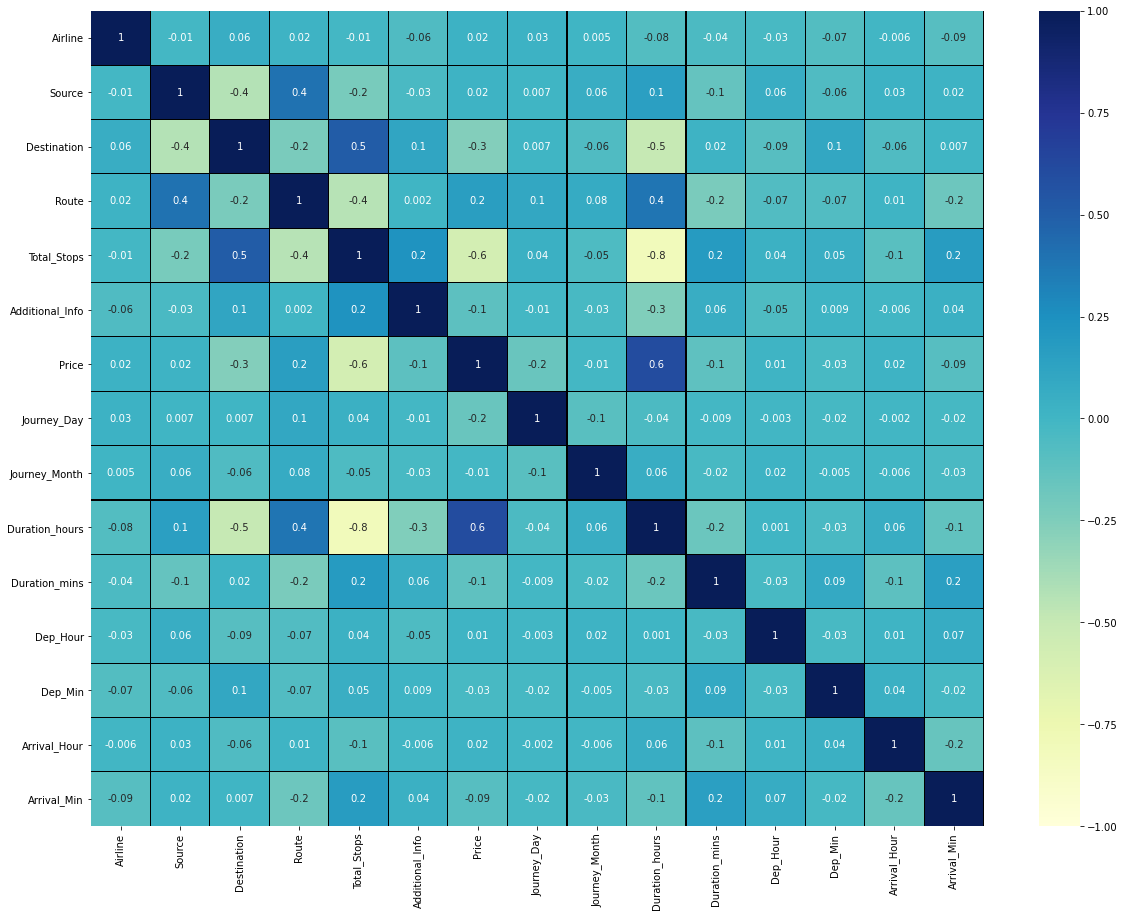

In [57]:
plt.figure(figsize=(20,15))    
sns.heatmap(new_df_train.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat map contains both positive and negative correlation. The feature Duration_hours is highly positively correlated with the target variable Price. The feature Total_Stops is highly Negatively correlated with the label. The features Duration_ours and Total_Stops, Duration_hours and Destination are highly negatively correlated with each other. This may lead to multicollinearity problem so we will check the VIF value to solve this, if we get the features having VIF more than 10 then we can drop those columns.

In [58]:
cor['Price'].sort_values(ascending=False)

Price              1.000000
Duration_hours     0.605075
Route              0.163635
Airline            0.024773
Arrival_Hour       0.021107
Source             0.016718
Dep_Hour           0.011430
Journey_Month     -0.013511
Dep_Min           -0.025585
Arrival_Min       -0.088909
Additional_Info   -0.114590
Duration_mins     -0.122893
Journey_Day       -0.163765
Destination       -0.263334
Total_Stops       -0.572413
Name: Price, dtype: float64

# Visualizing the correlation between label and features using bar plot

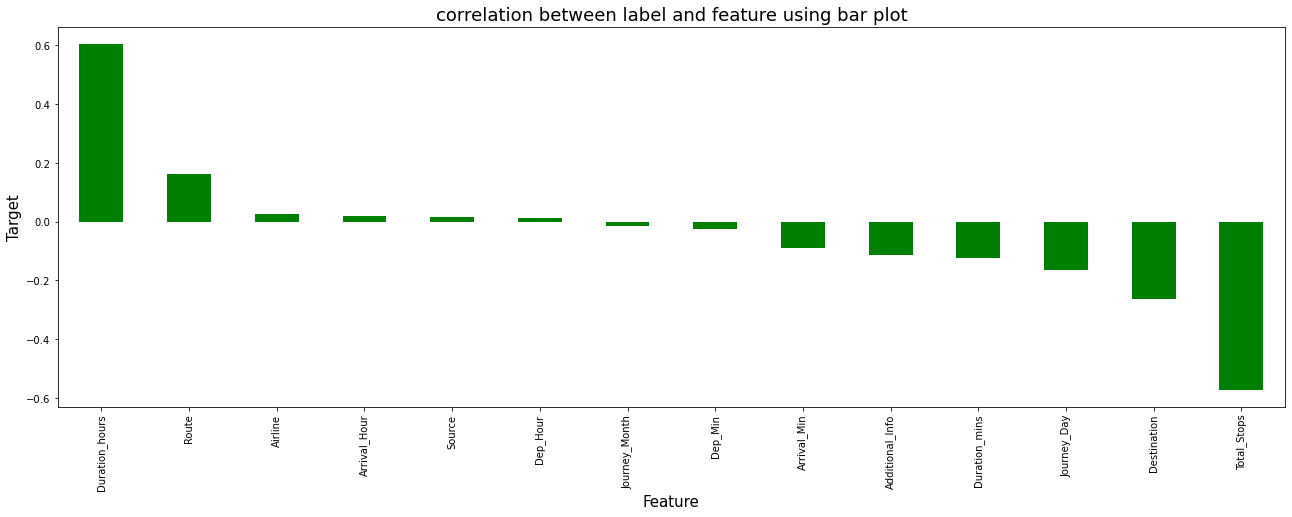

In [59]:
plt.figure(figsize=(22,7))
new_df_train.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

# Data Pre-processing

# 1. Splitting feature and label into x and y

In [60]:
x = new_df_train.drop("Price", axis=1)
y = new_df_train["Price"]

# 2. Feature Scaling using Standard Scalarization

In [61]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.345488,-1.655042,0.812707,-1.544003,1.402360,0.424603,1.286176,-0.754967,-1.183984,1.274299,1.649475,-0.235894,-1.794784,-0.889208
1,-1.464134,0.888124,-1.157048,0.254498,-0.253797,0.424603,-0.873920,-2.141814,-0.009867,-0.201145,-1.312186,1.362715,-0.046050,-0.586465
2,0.213836,0.040402,-0.172170,1.180998,-0.253797,0.424603,-0.760231,1.078344,1.086993,-1.676590,-0.615325,0.030541,-1.357601,0.019019
3,-0.345488,0.888124,-1.157048,0.445248,-0.805850,0.424603,-0.873920,1.603281,-0.354241,-0.201145,0.952614,-1.035199,1.411228,0.321762
4,-0.345488,-1.655042,0.812707,-1.244253,-0.805850,0.424603,-1.101299,-2.141814,-0.572492,0.979210,0.604183,1.362715,1.119772,0.624504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,-2.023458,0.888124,-1.157048,-0.290502,1.402360,0.424603,-0.987609,1.078344,-1.183984,0.093944,1.126829,1.629150,1.265500,0.019019
10613,-1.464134,0.888124,-1.157048,-0.290502,1.402360,0.424603,1.627244,-0.308502,-1.183984,0.389033,1.301044,1.096280,1.411228,-0.283723
10614,0.213836,-1.655042,0.812707,-1.544003,1.402360,0.424603,1.627244,-0.308502,-0.839609,-1.676590,-0.789540,-0.235894,-0.337506,-0.283723
10615,2.451129,-1.655042,0.812707,-1.544003,1.402360,0.424603,-1.101299,-2.141814,-1.183984,0.684121,-0.266894,0.296976,0.099677,-0.889208


We have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

# 3. Checking VIF (Multicolinearity)

In [62]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.044046,Airline
1,1.511995,Source
2,1.762240,Destination
3,1.583264,Route
4,3.330957,Total_Stops
5,1.107199,Additional_Info
6,1.035552,Journey_Day
7,1.022110,Journey_Month
8,3.175330,Duration_hours
9,1.125160,Duration_mins


Here we can notice the VIF value is less than 10 in all the columns. We are free from multicollinearity problem now so let's move to build our machine learning models.

# Modelling

Finding the best random state

In [63]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)        

Maximum r2 score is  0.9209059429790568  on Random_state  181


We have got the r2 score of 92% at the randomstate of 181

# Feature Importance

In [64]:
# Lets ckeck the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
Duration_hours,0.432
Journey_Day,0.120
Airline,0.105
Journey_Month,0.071
Additional_Info,0.060
Total_Stops,0.048
Route,0.041
Arrival_Hour,0.028
Dep_Hour,0.026


With the help of Random Forest Regressor we are able to list down the importance or priority given to a feature as per it's involvement or weightage in predicting our label.

# Creating train test split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Random Forest Regressor

In [66]:
# Checking R2 score for Random Forest Regressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_Score:',r2_score(y_test,predrf))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predrf))
print('MSE:',metrics.mean_squared_error(y_test, predrf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 0.9189241975969205
MAE: 651.5849480539862
MSE: 1643729.6529017892
RMSE: 1282.080205331082


We have got the accuracy score of 92% with this Random Forest Regressor.

# Decision Tree Regressor

In [67]:
# Checking R2 score for Decision Tree Regressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

# prediction
preddt=dt.predict(x_test)
print('R2_Score:',r2_score(y_test,preddt))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, preddt))
print('MSE:',metrics.mean_squared_error(y_test, preddt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preddt)))

R2_Score: 0.865539254785505
MAE: 700.9623352165725
MSE: 2726055.2163458187
RMSE: 1651.0769868015902


We have got an accuracy score of 83% for Decision Tree Regressor

# GradientBoosting Regressor

In [68]:
# Checking R2 score for GradientBoosting Regressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

# prediction
predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predgb))
print('MSE:',metrics.mean_squared_error(y_test, predgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 0.8349636575543565
MAE: 1234.3595800621524
MSE: 3345944.435254265
RMSE: 1829.1922903987609


We have got an accuracy of 83% with GradientBoostingRegressor

# BaggingRegressor

In [69]:
br=BaggingRegressor()
br.fit(x_train,y_train)

# prediction
predbr=br.predict(x_test)
print('R2_Score:',r2_score(y_test,predbr))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predbr))
print('MSE:',metrics.mean_squared_error(y_test, predbr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_Score: 0.9052532980801649
MAE: 682.966495904702
MSE: 1920893.2732605848
RMSE: 1385.9629407962482


We have got an accuracy score of 90% with BaggingRegressor

# ExtraTrees Regressor

In [70]:
# Checking R2 score for Extra Trees Regressor

et=ExtraTreesRegressor()
et.fit(x_train,y_train)

# prediction
predet=et.predict(x_test)
print('R2_Score:',r2_score(y_test,predet))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predet))
print('MSE:',metrics.mean_squared_error(y_test, predet))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predet)))

R2_Score: 0.9235108512537752
MAE: 625.3702814396316
MSE: 1550739.9025706074
RMSE: 1245.2870763685808


We have got an accuracy score of 92% with the ExtraTrees Regressor

# XGB Regressor

In [71]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb

xgb=xgb(verbosity=0)
xgb.fit(x_train,y_train)

# prediction
predxgb=xgb.predict(x_test)
print('R2_Score:',r2_score(y_test,predxgb))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predxgb))
print('MSE:',metrics.mean_squared_error(y_test, predxgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predxgb)))

R2_Score: 0.9149629299351701
MAE: 756.0239834830361
MSE: 1724040.3365547026
RMSE: 1313.027165200592


We have got an accuracy score of 91% with the XGB Regressor

# Cross-Validation

In [72]:
# Checking cv score for Random Forest Regressor
print('Random Forest:',cross_val_score(rf,x,y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print('Decision Tree:',cross_val_score(dt,x,y,cv=5).mean())

# Checking cv score for Gradient Boosting Regressor
print('Gradient Boosting:',cross_val_score(gb,x,y,cv=5).mean())

# Checking cv score for Bagging Regressor
print('Bagging Regressor:',cross_val_score(br,x,y,cv=5).mean())

# Checking cv score for ExtraTreesRegressor
print('ExtraTreesRegressor:',cross_val_score(et,x,y,cv=5).mean())

# Checking cv score for XGBRegressor
print('XGBRegressor:',cross_val_score(xgb,x,y,cv=5).mean())

Random Forest: 0.8793412335585588
Decision Tree: 0.7919224780516952
Gradient Boosting: 0.808607722334578
Bagging Regressor: 0.8738242656941015
ExtraTreesRegressor: 0.8980065158595465
XGBRegressor: 0.8943838253338647


Here we have got the cross-validation scores.

Based on the model score and the cross val score we have found that XGB Regressor as our best fitting model. We will perform Hyper parameter tuning on the best model.

# Hyper parameter tuning

In [73]:
#XGB Regressor

parameters = {'n_estimators' : [50,100,200, 400],
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10],
              'n_jobs' : [-2, -1, 1]}

In [74]:
GCV=GridSearchCV(xgb,parameters,cv=5)

In [75]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', vali

In [76]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 4, 'n_estimators': 400, 'n_jobs': -2}

In [77]:
from xgboost import XGBRegressor as xgb
Fare = xgb(gamma=0.0, max_depth=4, n_estimators=400, n_jobs=-2)
Fare.fit(x_train, y_train)
pred = Fare.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))

R2_Score: 91.0367724642861
RMSE value: 1348.036892158447
MAE: 793.923939927


After tuning, the accuracy score is 91%

# Saving the Model

In [78]:
import joblib
joblib.dump(Fare,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

# Test Data

In [79]:
test_df = pd.read_csv("Test_set.csv")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


This test dataset has no target variable, we need to use our past data(trained data) to get the ticket price prediction.

In [80]:
# Checking the dimension of the dataset
test_df.shape

(2671, 10)

There are 2671 rows and 10 columns are there in test dataset. All the columns are independent and there is no dependent variable in this dataset.

In [81]:
# Checking how many columns are there in the dataset
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [82]:
# Checking the types of the dataset
test_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

Feature Engineering


The columns Date_of_Journey, Dept_Time and Arrival_Time showing object data type which means python is not able to understand the type of data in this column.

Therefore, we have to convert this datatype into timestamp to use them properly for prediction.

In [83]:
# Converting Date and Time columns from object type to Date Type
test_df['Date_of_Journey']=pd.to_datetime(test_df['Date_of_Journey'])
test_df['Dep_Time']=pd.to_datetime(test_df['Dep_Time'])
test_df['Arrival_Time']=pd.to_datetime(test_df['Arrival_Time'])

In [84]:
# Again checking the type of dataset
test_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

In [85]:
# Extracting Day from Date_of_Journey column
test_df["Journey_Day"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_Journey column
test_df["Journey_Month"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [86]:
# Dropping Date_of_Journey column
test_df.drop("Date_of_Journey",axis=1,inplace=True)

So here the day and month has been extracted from date of journey

The column Duration has values in terms of minutes and hours. Duration means the time taken by the pane to reach the destination and it is the difference between Departure time and the arrival time. Now let's extract hours and minutes from Duration.

In [87]:
# Converting duration column into list
duration=list(test_df["Duration"])

for i in range(len(duration)):
    
    # Checking if duration contains oly hour or minute
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'   
        else:
            duration[i]="0h "+ duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    
    # Extracting hours feom Duration
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    
    # Extracting minutes from Duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [88]:
# Adding duration hours and duration mins to the data set
test_df["Duration_hours"] = duration_hours
test_df["Duration_mins"] = duration_mins

# Dropping Duration column
test_df.drop("Duration",axis=1,inplace=True)

In [89]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Dep_Time column
test_df["Dep_Hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time column
test_df["Dep_Min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute

In [90]:
# Dropping Dep_Time column
test_df.drop("Dep_Time",axis=1,inplace=True)

Similarly we can extract hours and minutes from Arrival_Time column and accordingly dropping Arrival_time column.

In [91]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Arrival_Time
test_df["Arrival_Hour"] = pd.to_datetime(test_df["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
test_df["Arrival_Min"] = pd.to_datetime(test_df["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
test_df.drop("Arrival_Time",axis=1,inplace=True)

Now we have extracted values from the respective columns, let's check the data frame after feature engineering.

In [92]:
# Checking dataset again
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45


In [93]:
test_df.shape

(2671, 14)

In [94]:
# Checking the value counts of each columns
for i in test_df.columns:
        print(test_df[i].value_counts())
        print('____________________________________________________')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
____________________________________________________
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
____________________________________________________
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
____________________________________________________
DEL → BOM → COK          624
BLR → DEL                389
CCU → BOM → BLR          253
CCU → BLR              

From the above value counts we can observe some repeated categories in some columns. Let's replace them.

In [95]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
test_df["Airline"] = test_df["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
test_df["Airline"] = test_df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
test_df["Airline"] = test_df["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
test_df["Destination"] = test_df["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
test_df["Additional_Info"] = test_df["Additional_Info"].replace("No info","No Info")

# Replacing "1 Long layover" and "2 Long layover" as "Long layover"in the column Additional Info
test_df["Additional_Info"] = test_df["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

In [96]:
val_count = ["Airline","Destination", "Additional_Info"]

for i in val_count:
    print(test_df[i].value_counts())
    print("_________________________________________")

Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64
_________________________________________
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
_________________________________________
No Info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
Business class                     1
Long layover                       1
Name: Additional_Info, dtype: int64
_________________________________________


In [97]:
# Checking number of unique values in each column
test_df.nunique()

Airline              8
Source               5
Destination          5
Route              100
Total_Stops          5
Additional_Info      6
Journey_Day          9
Journey_Month        7
Duration_hours      41
Duration_mins       12
Dep_Hour            24
Dep_Min             12
Arrival_Hour        24
Arrival_Min         12
dtype: int64

These are the number of unique values present in each columns.

In [99]:
# Checking null values in the dataframe
test_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
Duration_hours     0
Duration_mins      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

There are no missing values present in any of the columns.

# Statistical Overview of the Test Data

In [100]:
test_df.describe()

,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,12.026956,5.607263,10.189068,28.397604,12.603519,24.891426,13.585174,24.558218
std,8.564408,3.042952,8.390683,16.747651,5.686673,19.086522,7.040396,16.775436
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,2.000000,15.000000,8.000000,5.000000,8.000000,10.000000
50%,6.000000,5.000000,8.000000,30.000000,12.000000,25.000000,15.000000,25.000000
75%,21.000000,6.000000,15.000000,45.000000,18.000000,45.000000,19.000000,35.000000
max,27.000000,12.000000,40.000000,55.000000,23.000000,55.000000,23.000000,55.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

In [102]:
# checking for categorical columns
categorical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [103]:
# Now checking for numerical columns
numerical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


# Identifying the outliers

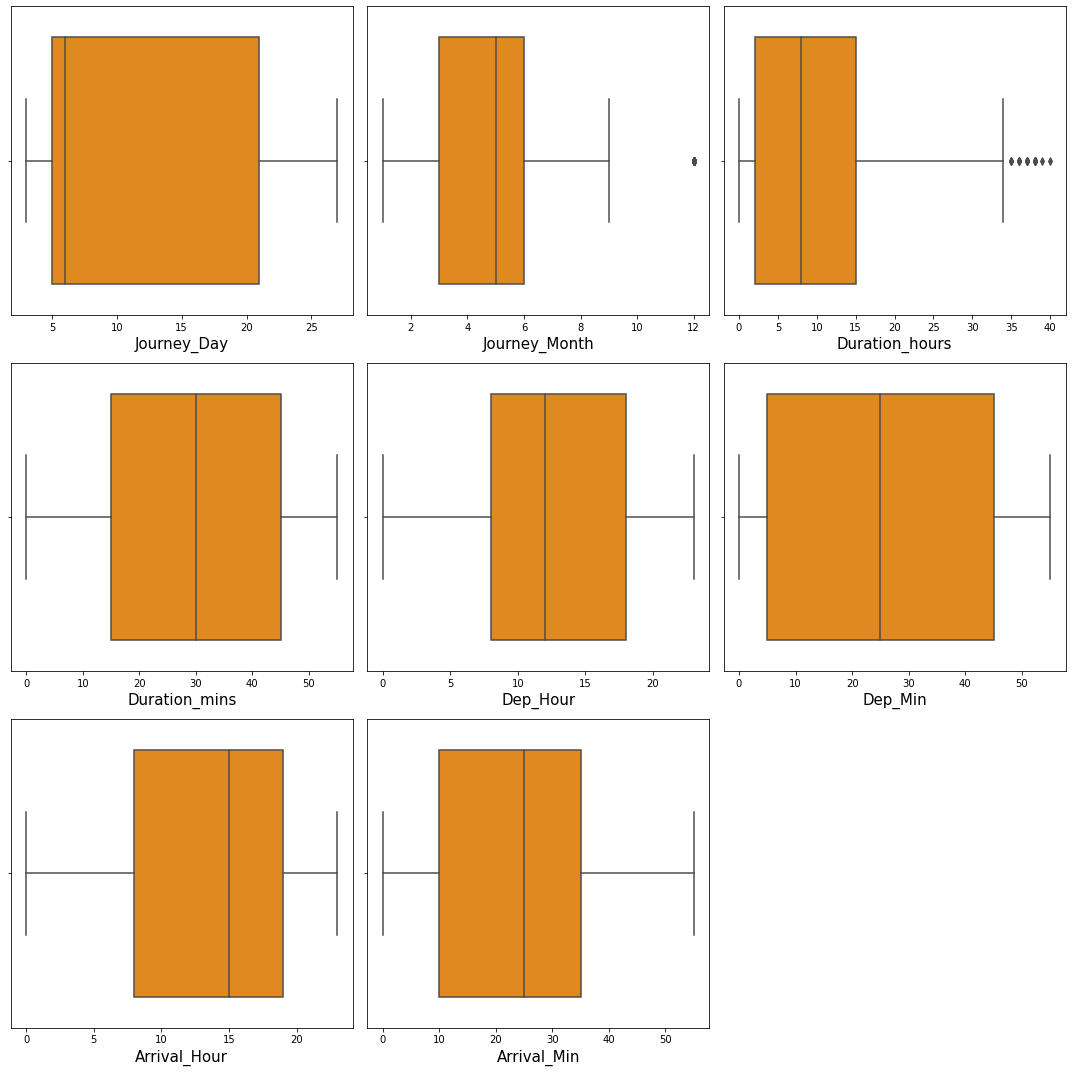

In [104]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(test_df[column],color="darkorange")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()


# Removing outliers

In [105]:
feature = test_df[['Duration_hours','Journey_Month']]


z=np.abs(zscore(feature))

z

array([[0.02253728, 0.12908857],
       [0.73775001, 2.10122721],
       [1.5270903 , 0.1996012 ],
       ...,
       [0.49934577, 0.12908857],
       [0.57347333, 0.12908857],
       [0.45427121, 0.12908857]])

In [106]:
# Creating new dataframe
new_test_df = test_df[(z<3).all(axis=1)] 
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No Info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No Info,24,6,2,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No Info,6,6,23,55,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No Info,27,3,2,35,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,3,6,6,35,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,3,6,15,15,4,0,19,15


# Checking skewness in the data

In [107]:
new_test_df.skew().sort_values()

Arrival_Hour     -0.432551
Duration_mins    -0.110629
Dep_Hour          0.083357
Arrival_Min       0.110111
Dep_Min           0.132681
Journey_Day       0.475210
Journey_Month     0.591565
Duration_hours    0.795392
dtype: float64

# Removing skewness using log transformation

In [108]:
new_test_df["Duration_hours"] = np.log1p(new_test_df["Duration_hours"])
new_test_df["Journey_Month"] = np.log1p(new_test_df["Journey_Month"])




In [109]:
new_test_df.skew().sort_values()

Journey_Month    -0.541053
Arrival_Hour     -0.432551
Duration_hours   -0.134743
Duration_mins    -0.110629
Dep_Hour          0.083357
Arrival_Min       0.110111
Dep_Min           0.132681
Journey_Day       0.475210
dtype: float64

# Encoding the Categorical columns

In [110]:
le=LabelEncoder()
new_test_df[categorical_col]= new_test_df[categorical_col].apply(le.fit_transform)
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,0,4,6,1.945910,2.397895,55,17,30,4,25
1,3,3,0,65,0,4,5,2.564949,1.609438,0,6,20,10,20
2,4,2,1,76,0,2,21,1.791759,3.178054,45,19,15,19,0
3,5,2,1,76,0,4,21,1.791759,2.639057,0,8,0,21,0
4,0,0,2,16,4,4,24,1.945910,1.098612,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,4,6,1.945910,3.178054,55,20,30,20,25
2667,3,3,0,43,4,4,27,1.386294,1.098612,35,14,20,16,55
2668,4,2,1,76,0,4,3,1.945910,1.945910,35,21,50,4,25
2669,1,2,1,76,0,4,3,1.945910,2.772589,15,4,0,19,15


# Feature Scaling using Standard Scalarization

In [111]:
scaler = StandardScaler()
new_test_df = pd.DataFrame(scaler.fit_transform(new_test_df), columns=new_test_df.columns)
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.393727,-0.706193,0.344970,0.374141,1.583185,0.766320,0.272445,-1.354818,0.025591
1,-0.348833,0.873978,-1.175634,0.398570,-0.791072,0.393727,-0.823069,1.565339,-0.579376,-1.697747,-1.172433,-0.252462,-0.503215,-0.272182
2,0.233214,0.031440,-0.167242,0.804966,-0.791072,-2.166466,1.046954,0.041078,1.317622,0.986652,1.118821,-0.514916,0.774190,-1.463273
3,0.815260,0.031440,-0.167242,0.804966,-0.791072,0.393727,1.046954,0.041078,0.665790,-1.697747,-0.819933,-1.302277,1.058057,-1.463273
4,-2.094973,-1.653635,0.841150,-1.411740,1.429790,0.393727,1.397583,0.344970,-1.197140,1.284918,1.823822,1.584714,-1.638686,1.216682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-1.512927,0.873978,-1.175634,-0.118662,-0.791072,0.393727,-0.706193,0.344970,1.317622,1.583185,1.295071,0.272445,0.916123,0.025591
2649,-0.348833,0.873978,-1.175634,-0.414222,1.429790,0.393727,1.748212,-0.758252,-1.197140,0.390119,0.237569,-0.252462,0.348388,1.812227
2650,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.393727,-1.056822,0.344970,-0.172465,0.390119,1.471321,1.322260,-1.354818,0.025591
2651,-1.512927,0.031440,-0.167242,0.804966,-0.791072,0.393727,-1.056822,0.344970,0.827275,-0.802948,-1.524934,-1.302277,0.774190,-0.569955


We have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

We have already loaded the saved model after saving the final model. Now let's predict the flight price using test data.

# Prediction Results

In [112]:
# Predicting the flight price from the features of the testing data 
Predicted_Price = Fare.predict(new_test_df)
Predicted_Price

array([13681.307,  4625.892, 12331.761, ..., 17254.76 , 13192.548,
        7430.343], dtype=float32)

# DataFrame and Saving the predictions

In [113]:
Prediction = pd.DataFrame()
Prediction['Price']= Predicted_Price
Prediction

,Price
0,13681.306641
1,4625.892090
2,12331.760742
3,10622.694336
4,2774.596191
...,...
2648,9334.910156
2649,5227.926758
2650,17254.759766
2651,13192.547852


Here we are adding the predicted price output to our original test dataset to complete it with features and target column.

In [114]:
## Saving the predictions
Prediction.to_csv("Predicted_Flight_Price_Data.csv", index=False)

With the help of .to_csv we have exported the entire dataset in comma separated values format that can be checked using the Excel spreadsheet program.

# Modeling and Prediction of the Flight Price Prediction is completed.